### 1. import useful libaries for evaluation of dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(12.,6.)})
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

## Data Description.

column name in cleaned df | meaning 
--- | --- 
**Customer Number** | A sequential number assigned to the customers (this column is hidden and excluded – this unique identifier will not be used directly).
**Offer Accepted** | Did the customer accept (Yes) or reject (No) the offer.
**Reward** | The type of reward program offered for the card. 
**Mailer Type** | Letter or postcard.
**Income Level** | Low, Medium, or High.
**Bank Accounts Open** | How many non-credit-card accounts are held by the customer.
**Overdraft Protection** | Does the customer have overdraft protection on their checking account(s) (Yes or No).
**Credit Rating** | Low, Medium, or High.
**Credit Cards Held** | The number of credit cards held at the bank.
**Homes Owned** | The number of homes owned by the customer.
**Household Size** | The number of individuals in the family.
**Own Your Home** | Does the customer own their home? (Yes or No).
**Average Balance** |  Average account balance (across all accounts over time). Q1, Q2, Q3, and Q4.
**Balance** |The average balance for each quarter in the last year.


**Goal: Build a model that will provide insight into why some bank customers accept credit card offers**

### 2. Evaluate the dataset

In [2]:
df=pd.read_csv('creditcardmarketingfull.csv')
df

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

#### 2.1 
- checking for duplicates
- checking the rows with null values
- dropping rows with more than one null values
- standardize header names

In [4]:
df.duplicated().sum()

0

In [5]:
df[df.isnull().any(axis=1)]

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
323,324,No,Points,Postcard,Medium,1,No,High,1,1,4,No,NaN,NaN,NaN,NaN,NaN
3070,3071,Yes,Air Miles,Postcard,Low,3,No,Medium,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3108,3109,No,Air Miles,Letter,Low,1,No,High,3,1,4,Yes,NaN,NaN,NaN,NaN,NaN
3789,3790,No,Air Miles,Letter,Medium,2,No,High,3,1,3,No,NaN,NaN,NaN,NaN,NaN
5083,5084,No,Points,Letter,Medium,1,No,High,1,1,3,Yes,NaN,NaN,NaN,NaN,NaN
5677,5678,No,Air Miles,Postcard,Low,1,No,Low,2,1,4,Yes,NaN,NaN,NaN,NaN,NaN
5689,5690,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,5,No,NaN,NaN,NaN,NaN,NaN
6932,6933,No,Air Miles,Postcard,Medium,1,No,Medium,2,2,4,Yes,NaN,NaN,NaN,NaN,NaN
7787,7788,No,Air Miles,Letter,Low,2,No,Low,1,1,4,Yes,NaN,NaN,NaN,NaN,NaN
7864,7865,No,Cash Back,Postcard,High,2,Yes,Low,2,1,3,No,NaN,NaN,NaN,NaN,NaN


In [6]:
df_new=df.dropna(axis = 0, how ='any')
df_new

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [7]:
df_new.rename({'# Bank Accounts Open':'Bank Accounts Open'}, axis=1, inplace=True)
df_new.rename({'# Credit Cards Held':'Credit Cards Held'}, axis=1, inplace=True)
df_new.rename({'# Homes Owned':'Homes Owned'}, axis=1, inplace=True)

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       17976 non-null  int64  
 1   Offer Accepted        17976 non-null  object 
 2   Reward                17976 non-null  object 
 3   Mailer Type           17976 non-null  object 
 4   Income Level          17976 non-null  object 
 5   Bank Accounts Open    17976 non-null  int64  
 6   Overdraft Protection  17976 non-null  object 
 7   Credit Rating         17976 non-null  object 
 8   Credit Cards Held     17976 non-null  int64  
 9   Homes Owned           17976 non-null  int64  
 10  Household Size        17976 non-null  int64  
 11  Own Your Home         17976 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

### 3. Evaluate the dependent(y) and independent(X) variables seperately

- dependent variable(y)

In [9]:
y=df_new['Offer Accepted']

In [10]:
# imbalanced dataset for dependent variable with just 5.7% of yes 

y.value_counts() 

No     16955
Yes     1021
Name: Offer Accepted, dtype: int64

In [11]:
# encode the dependent variable y into binary code to be able to fit into a model
y_enc=pd.get_dummies(y, drop_first=True)

In [12]:
y_enc.value_counts()

Yes
0      16955
1       1021
dtype: int64

- independent variable(X)

In [13]:
# splitting the independent variable(X) into categorical and numerical for further evaluations

X_num=df_new.select_dtypes(exclude=['object'])
X_cat=df_new.select_dtypes(object)

In [14]:
# dealing with the numerical independent variable(X)

X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Number     17976 non-null  int64  
 1   Bank Accounts Open  17976 non-null  int64  
 2   Credit Cards Held   17976 non-null  int64  
 3   Homes Owned         17976 non-null  int64  
 4   Household Size      17976 non-null  int64  
 5   Average Balance     17976 non-null  float64
 6   Q1 Balance          17976 non-null  float64
 7   Q2 Balance          17976 non-null  float64
 8   Q3 Balance          17976 non-null  float64
 9   Q4 Balance          17976 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.5 MB


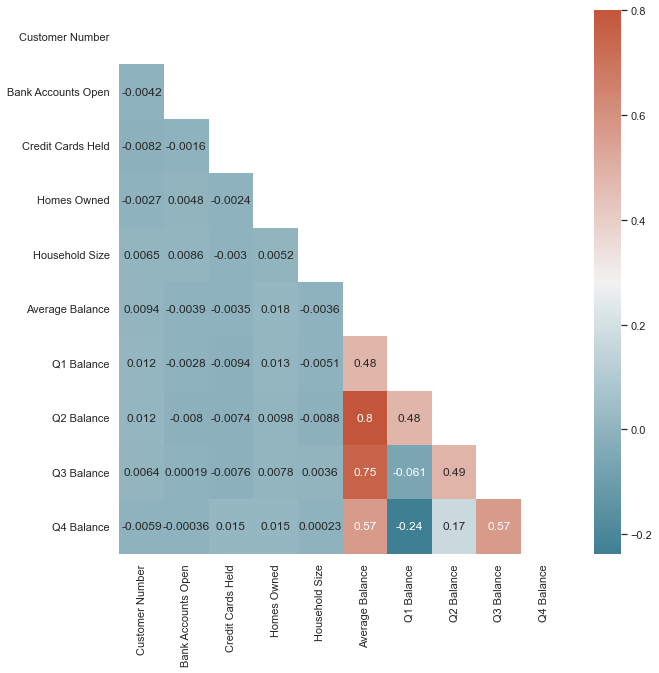

In [15]:
# checking for Multicollinearity in the independent number varaibles

cm=X_num.corr()
mask=np.zeros_like(cm)
mask[np.triu_indices_from(mask)]=True
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(cm, mask=mask, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap = True));

##### dropping the quater balances columns because it has high correlation with each other and the average balance which will probably affect the prediction of our dependent variable and it also reduce noise in our data(columns with little to no correlation to our target variable)(y)

In [16]:
X_num.drop(['Q1 Balance'], inplace=True, axis=1)

In [17]:
X_num.drop(['Q2 Balance'], inplace=True, axis=1)

In [18]:
X_num.drop(['Q3 Balance'], inplace=True, axis=1)

In [19]:
X_num.drop(['Q4 Balance'], inplace=True, axis=1)

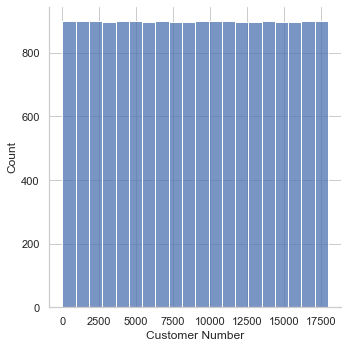

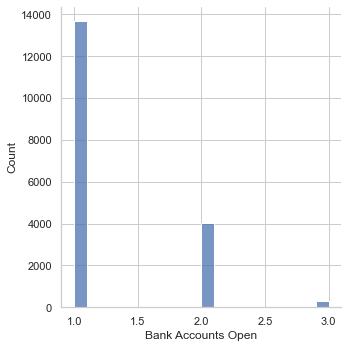

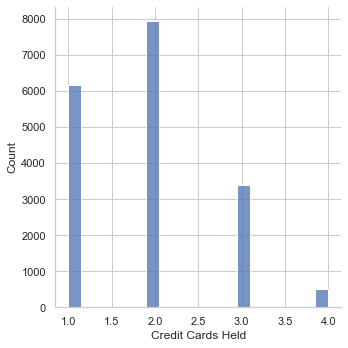

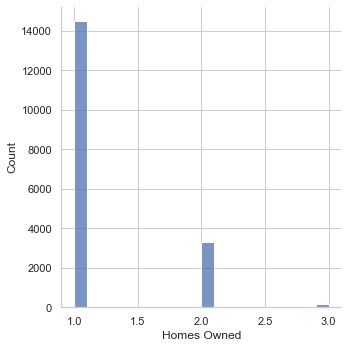

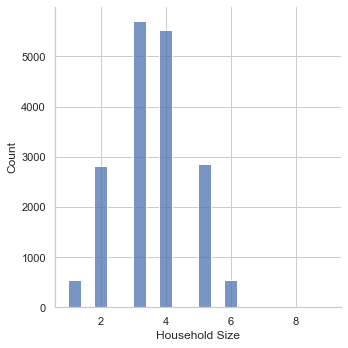

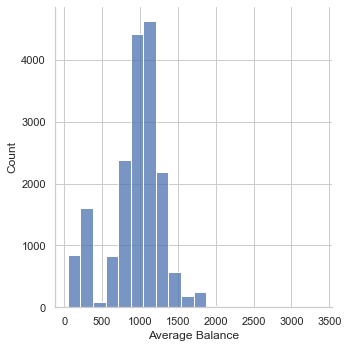

In [20]:
# checking for bad outliers and ammending with log transform if there is any

for col in X_num.columns:
    sns.displot(df_new[col],bins=20)
    plt.show()

In [21]:
# dropping the customer number column beacuse it is just a sequential number(id) assigned to the customers 

X_num.drop(['Customer Number'], inplace=True, axis=1)

In [22]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Bank Accounts Open  17976 non-null  int64  
 1   Credit Cards Held   17976 non-null  int64  
 2   Homes Owned         17976 non-null  int64  
 3   Household Size      17976 non-null  int64  
 4   Average Balance     17976 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 842.6 KB


In [23]:
# scaling all numerical variables

from sklearn.preprocessing import MinMaxScaler as mms

In [24]:
for c in X_num.columns:
    X_num[c]=mms().fit_transform(X_num[c].values.reshape(-1,1))

In [25]:
X_num.head()

,Bank Accounts Open,Credit Cards Held,Homes Owned,Household Size,Average Balance
0,0.0,0.333333,0.0,0.375,0.335292
1,0.0,0.333333,0.5,0.500,0.029837
2,0.5,0.333333,0.0,0.125,0.068791
3,0.5,0.000000,0.0,0.375,0.352848
4,0.0,0.333333,0.0,0.625,0.350437


In [26]:
# dealing with categorical variable

X_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17976 entries, 0 to 17999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Offer Accepted        17976 non-null  object
 1   Reward                17976 non-null  object
 2   Mailer Type           17976 non-null  object
 3   Income Level          17976 non-null  object
 4   Overdraft Protection  17976 non-null  object
 5   Credit Rating         17976 non-null  object
 6   Own Your Home         17976 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [27]:
#checking which categorical columns are not correlated to the target(Offer Accepted) using chi square for p value greater than 0.05

from scipy.stats import chi2_contingency

In [28]:
data_crosstab=pd.crosstab(X_cat['Offer Accepted'], X_cat['Overdraft Protection'], margins = False)

In [29]:
data_crosstab

Overdraft Protection,No,Yes
Offer Accepted,,
No,14427,2528
Yes,873,148


In [30]:
P_value=chi2_contingency(data_crosstab, correction=False)

In [31]:
P_value[1]

0.7178516689441322

In [32]:
data_crosstab=pd.crosstab(X_cat['Offer Accepted'], X_cat['Own Your Home'], margins = False)

In [33]:
data_crosstab

Own Your Home,No,Yes
Offer Accepted,,
No,5980,10975
Yes,360,661


In [34]:
P_value=chi2_contingency(data_crosstab, correction=False)

In [35]:
P_value[1]

0.9946716209502822

#### the P-value came higher than 0.05 for 'own your home' and 'overdraft protection'. Hence Hypothesis will be accepted. Which means the variables are not correlated with the target variable.This means, if two variables are correlated, then the P-value will come very close to zero.

In [36]:
# dropping the columns which are not correlated to the target variable i.e have p-value of more than 0.05

X_cat.drop(['Own Your Home'], inplace=True, axis=1)
X_cat.drop(['Overdraft Protection'], inplace=True, axis=1)

In [37]:
#dropping also the target variable column from the X axis

X_cat.drop(['Offer Accepted'], inplace=True, axis=1)

In [38]:
#using get dummies to encode the categorical values

X_cat_enc=pd.get_dummies(X_cat)
X_cat_enc

,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer Type_Letter,Mailer Type_Postcard,Income Level_High,Income Level_Low,Income Level_Medium,Credit Rating_High,Credit Rating_Low,Credit Rating_Medium
0,1,0,0,1,0,1,0,0,1,0,0
1,1,0,0,1,0,0,0,1,0,0,1
2,1,0,0,0,1,1,0,0,0,0,1
3,1,0,0,1,0,0,0,1,1,0,0
4,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17995,0,1,0,1,0,1,0,0,0,1,0
17996,0,1,0,1,0,1,0,0,0,1,0
17997,0,1,0,1,0,1,0,0,0,1,0
17998,0,1,0,1,0,0,0,1,0,0,1


#### concat the x-num scaled and the x_cat encoded back into a single dataframe
- first we check the shape if they correspond on the index then concat

In [39]:
print(X_num.shape)
print('numbers and')
print(X_cat_enc.shape)
print('categories')

(17976, 5)
numbers and
(17976, 11)
categories


In [40]:
X_full=pd.concat([X_num,X_cat_enc], axis=1)

In [41]:
X_full.head()

,Bank Accounts Open,Credit Cards Held,Homes Owned,Household Size,Average Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer Type_Letter,Mailer Type_Postcard,Income Level_High,Income Level_Low,Income Level_Medium,Credit Rating_High,Credit Rating_Low,Credit Rating_Medium
0,0.0,0.333333,0.0,0.375,0.335292,1,0,0,1,0,1,0,0,1,0,0
1,0.0,0.333333,0.5,0.500,0.029837,1,0,0,1,0,0,0,1,0,0,1
2,0.5,0.333333,0.0,0.125,0.068791,1,0,0,0,1,1,0,0,0,0,1
3,0.5,0.000000,0.0,0.375,0.352848,1,0,0,1,0,0,0,1,1,0,0
4,0.0,0.333333,0.0,0.625,0.350437,1,0,0,1,0,0,0,1,0,0,1


In [42]:
# redefining the X and y

y=y_enc
X=X_full

In [43]:
y

,Yes
0,0
1,0
2,0
3,0
4,0
...,...
17995,0
17996,0
17997,0
17998,0


In [44]:
X

,Bank Accounts Open,Credit Cards Held,Homes Owned,Household Size,Average Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer Type_Letter,Mailer Type_Postcard,Income Level_High,Income Level_Low,Income Level_Medium,Credit Rating_High,Credit Rating_Low,Credit Rating_Medium
0,0.0,0.333333,0.0,0.375,0.335292,1,0,0,1,0,1,0,0,1,0,0
1,0.0,0.333333,0.5,0.500,0.029837,1,0,0,1,0,0,0,1,0,0,1
2,0.5,0.333333,0.0,0.125,0.068791,1,0,0,0,1,1,0,0,0,0,1
3,0.5,0.000000,0.0,0.375,0.352848,1,0,0,1,0,0,0,1,1,0,0
4,0.0,0.333333,0.0,0.625,0.350437,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.0,0.000000,0.0,0.500,0.035940,0,1,0,1,0,1,0,0,0,1,0
17996,0.0,0.666667,0.0,0.250,0.241787,0,1,0,1,0,1,0,0,0,1,0
17997,0.0,0.333333,0.0,0.375,0.313140,0,1,0,1,0,1,0,0,0,1,0
17998,0.0,1.000000,0.5,0.125,0.293550,0,1,0,1,0,0,0,1,0,0,1


### 4. Building and Selecting the best Model for our target prediction

In [45]:
# importing the train and test function


from sklearn.model_selection import train_test_split

#### 4.1 Logistic regression model

In [46]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

#### first we must remember that we are working with an imbalance target variable for (y) so we must apply a data balancing technique for efficient performance of our model

In [47]:
# we import and apply the combination of Over-sampling using SMOTE followed by under-sampling using Tomeklinks

from imblearn.combine import SMOTETomek

In [48]:
smt = SMOTETomek(random_state=42)

In [49]:
X_smt, y_smt = smt.fit_resample(X, y)

In [72]:
# checking the application of the data imbalance technique

X.shape

(17976, 16)

In [73]:
X_smt.shape

(32512, 16)

In [74]:
y.value_counts()

Yes
0      16955
1       1021
dtype: int64

In [75]:
y_smt.value_counts()

Yes
0      16256
1      16256
dtype: int64

In [50]:
# apply the train test split

X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size=0.3, random_state=40)

In [51]:
clf_smt=logreg.fit(X_train_smt,y_train_smt)

In [52]:
y_pred_smt=clf_smt.predict(X_test_smt)

#### 4.1.1 testing metrics for accuracy (logistic regression)

In [53]:
# import accuracy metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [54]:
accuracy_score(y_test_smt,y_pred_smt)

0.7100676645478778

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

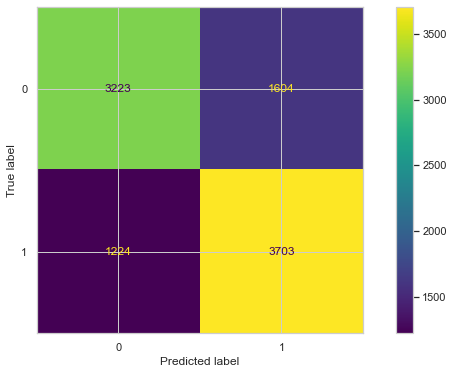

In [56]:
cm = confusion_matrix(y_test_smt, y_pred_smt, labels=clf_smt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_smt.classes_)
disp.plot()

#### 4.2 KNN classifier model

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [59]:
# apply the train test split

X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size=0.3, random_state=40)

In [60]:
cknn_smt=neigh.fit(X_train_smt,y_train_smt)

In [61]:
y_pred_smt=cknn_smt.predict(X_test_smt)

#### 4.2.1 testing metrics for accuracy (knn)

In [62]:
accuracy_score(y_test_smt,y_pred_smt)

0.899323354521222

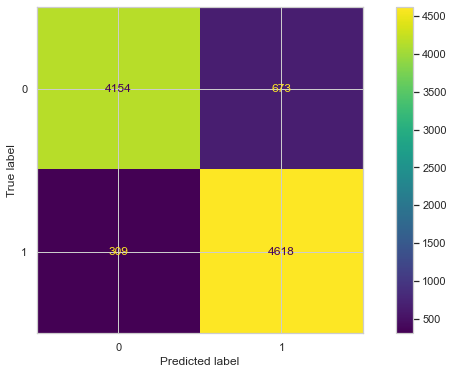

In [63]:
cm = confusion_matrix(y_test_smt, y_pred_smt, labels=cknn_smt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cknn_smt.classes_)
disp.plot()

#### 4.3 DecisionTreeClassifier model

In [64]:
from sklearn.tree import DecisionTreeClassifier
cdt = DecisionTreeClassifier(random_state=0)

In [65]:
# apply the train test split

X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_smt, y_smt, test_size=0.3, random_state=40)

In [66]:
cdt_smt=cdt.fit(X_train_smt,y_train_smt)

In [67]:
y_pred_smt=cdt_smt.predict(X_test_smt)

#### 4.3.1 testing metrics for accuracy (DecisionTree)

In [68]:
accuracy_score(y_test_smt,y_pred_smt)

0.9231084683206889

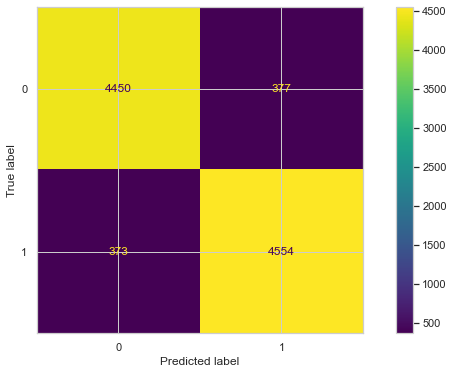

In [69]:
cm = confusion_matrix(y_test_smt, y_pred_smt, labels=cknn_smt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cknn_smt.classes_)
disp.plot()

#### from comparing the accuracy models and using the same measure of accuracy as a benchmark.find the Decision Tree model best fits our data.